In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

Read the dataset

In [2]:
FILE_PATH = os.path.join(os.getcwd(),'..','churn.csv' )
df = pd.read_csv(FILE_PATH)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


'EDA'

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

* `Data Viz & HAndlig outlines`

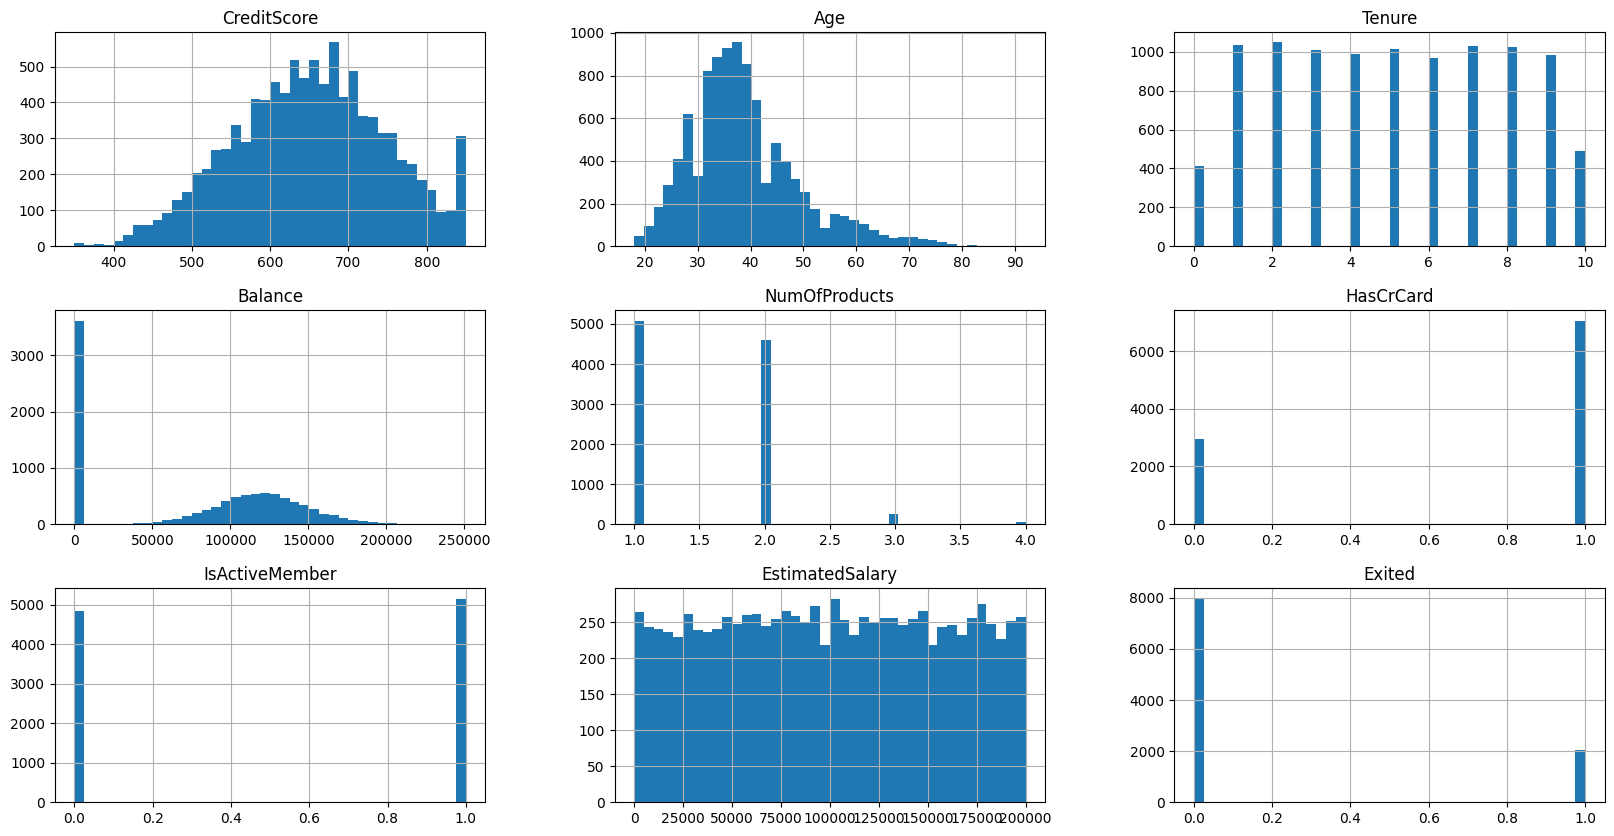

In [12]:
df.hist(bins = 40, figsize=(20, 10)) 
plt.show()

In [13]:
df[df['Age']>70]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...
9646,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9671,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [14]:
df[df["Age"]>80].index.tolist()

[766, 2458, 3033, 3387, 3531, 4931, 6443, 6759, 7526, 7956, 9080, 9309]

In [15]:
df.drop(index=df[df["Age"]>80].index.tolist(), axis=0, inplace=True)

In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [17]:
df['Geography'].value_counts(), df['Geography'].value_counts().index.tolist()

(Geography
 France     5006
 Germany    2506
 Spain      2476
 Name: count, dtype: int64,
 ['France', 'Germany', 'Spain'])

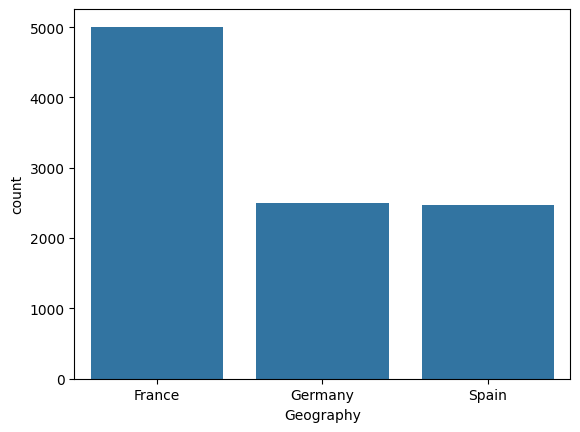

In [18]:
# countplot
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts(ascending=False).index.tolist())
plt.show()

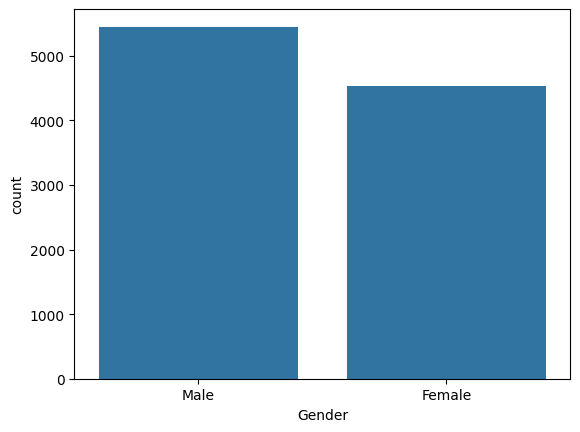

In [19]:
## counter plot for gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())
plt.show()

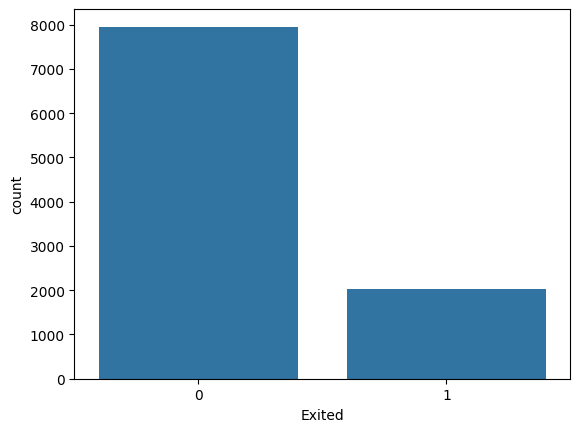

In [20]:
## counter plot for exited
sns.countplot(data=df, x='Exited', order=df['Exited'].value_counts().index.tolist())
plt.show()

<Axes: ylabel='EstimatedSalary'>

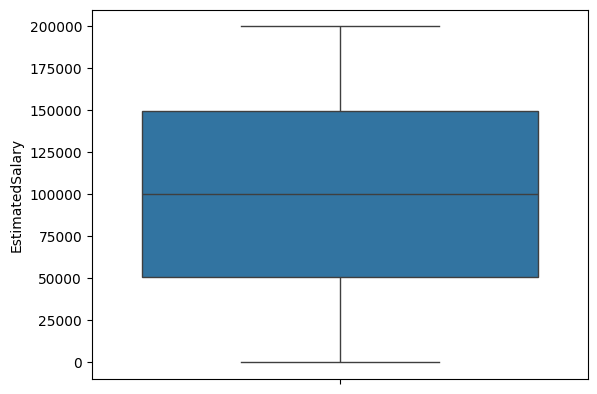

In [21]:
# Boxplot
sns.boxplot(data=df, y='EstimatedSalary')

In [22]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,650.491990,38.867040,5.012215,76510.392653,1.530136,0.705547,0.514618,100082.673377,0.203845
std,96.602495,10.373468,2.891906,62399.394235,0.581750,0.455819,0.499811,57505.152617,0.402875
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97245.995000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,717.250000,44.000000,7.000000,127660.767500,2.000000,1.000000,1.000000,149382.097500,0.000000
max,850.000000,80.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


* `Bivariate Vis`

In [23]:
df[['Gender', 'EstimatedSalary']].groupby(by='Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

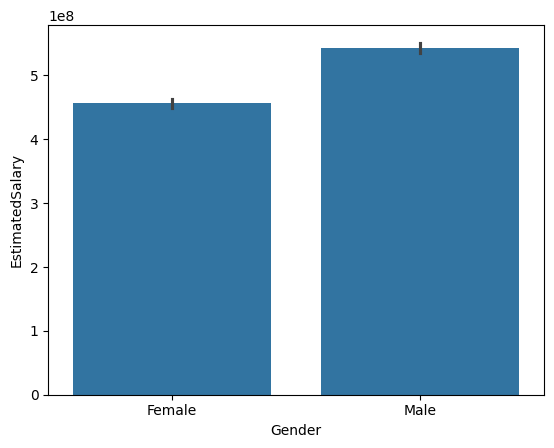

In [24]:
sns.barplot(data=df, x='Gender', y='EstimatedSalary', estimator='sum')
plt.show()

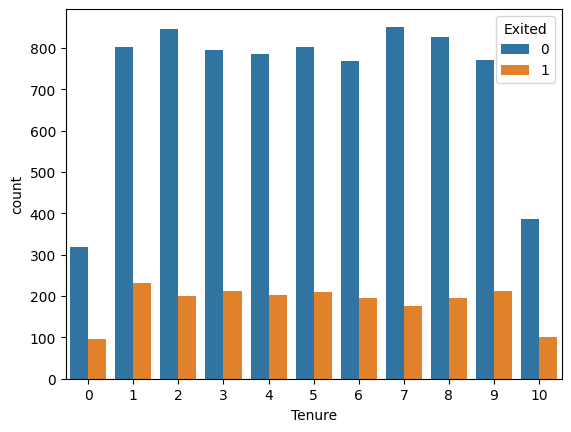

In [25]:
# relation between Tenure and Exited
sns.countplot(data=df, x="Tenure", hue='Exited')
plt.show()

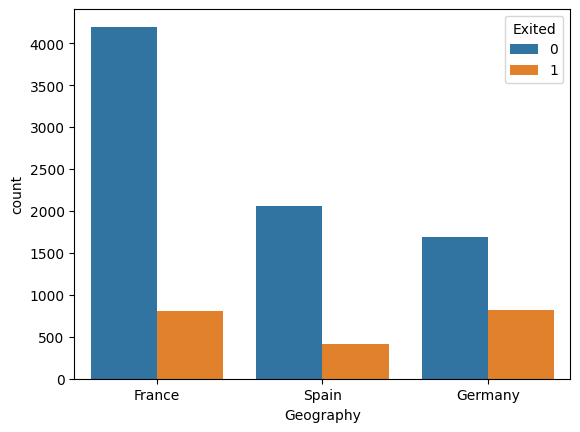

In [26]:
# relation between Tenure and Exited
sns.countplot(data=df, x="Geography", hue='Exited')
plt.show()

* `Split the DatSet`

In [27]:
# split the datat to x, y 
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# split to train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, stratify=y, random_state=45)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (8489, 10)
y_train.shape 	 (8489,)
******************************
X_test.shape 	 (1499, 10)
y_test.shape 	 (1499,)


* `Data preprocessiong & Pipeline` 

In [28]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5154,729,Germany,Female,42,4,97495.80,2,0,0,2002.50
2030,624,Spain,Female,28,2,0.00,2,0,1,104353.26
4327,678,Germany,Female,30,1,139676.95,2,0,1,16146.00
7841,706,Germany,Female,46,7,111288.18,1,1,1,149170.25
7283,667,France,Male,31,3,99513.91,1,1,1,189657.26


In [29]:
X_train.select_dtypes(exclude='object').columns.tolist() 

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [30]:
# slice lists
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categ_cols = ['Geography', 'Gender']
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols)) # used set to apple to subtract the columns name list


In [31]:
# Pipleline

# Numerical: num_cols -> Impute using median, and Standardization
# Categorical: categ_cols -> Impute most_frequent, and OHE
# Ready: ready_cols -> Impute most_frequent

num_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
        ])
categ_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', sparse_output=False))
        ])
ready_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# combine all 
all_pipeline = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_cols),
    ('categorical', categ_pipeline, categ_cols),
    ('ready', ready_pipeline, ready_cols)
])

# Fit
all_pipeline.fit(X_train)

# transform
X_train_final = all_pipeline.transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [32]:
num_pipeline.fit_transform(X_train[num_cols])

array([[ 0.80707315,  0.30440239,  0.34747428, -1.7022082 ],
       [-0.27628408, -1.04277147, -1.21859988,  0.07755534],
       [ 0.28087107, -0.85031806,  1.02502972, -1.45626879],
       ...,
       [-0.52390859,  1.74780296,  1.00541809,  0.06355713],
       [-0.83343922, -0.17673113, -1.21859988,  1.52787779],
       [ 0.70389627, -0.65786465,  1.13631926, -0.3960097 ]])

In [33]:
categ_pipeline.fit_transform(X_train[categ_cols])

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [34]:
print('X_train_final.shape \t', X_train_final.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test_final.shape \t', X_test_final.shape)
print('y_test.shape \t', y_test.shape)

X_train_final.shape 	 (8489, 11)
y_train.shape 	 (8489,)
******************************
X_test_final.shape 	 (1499, 11)
y_test.shape 	 (1499,)


In [35]:
ARTIFACT_FOLDER_PATH = os.path.join(os.getcwd(),'..', 'artifact')
os.makedirs(ARTIFACT_FOLDER_PATH, exist_ok=True)

In [36]:
dump_path=os.path.join(ARTIFACT_FOLDER_PATH, 'all_pipeline.pkl')

In [37]:
# dump pipline
joblib.dump(all_pipeline, os.path.join(ARTIFACT_FOLDER_PATH,dump_path))

['c:\\Users\\darck\\OneDrive - Alexandria University\\DEPI\\Generative ai\\Coding area\\Machine_learning\\model\\notebook\\..\\artifact\\all_pipeline.pkl']

-------------------

* `Dealing with Imbalanced Target`

In [38]:
## 1. Don't take care of Imbalanced target

## 2. prepare class_weights for solving imbalanced dataset
vals_count = 1 - np.bincount(y_train) / len(y_train)
vals_count  =vals_count / np.sum(vals_count)

dict_weights = {}
for i in range(2):
    dict_weights[i] = vals_count[i] 

## 3. Use SMOTE for oversampling the minority class
over = SMOTE(sampling_strategy=0.7)
X_train_over, y_train_over = over.fit_resample(X_train_final, y_train)

### to get the probability of evry value in the data using `np.bincount`

In [44]:
np.bincount(y_train) / len(y_train)

array([0.79620686, 0.20379314])

In [39]:
arr = np.array([0, 0, 0, 2, 2, 3, 2, 5, 4])
np.bincount(arr)

array([3, 0, 3, 1, 1, 1])

In [40]:
# i want to geT how the 0,1 be in the data 
vals_count = 1 - np.bincount(y_train) / len(y_train)
vals_count  =vals_count / np.sum(vals_count)

dict_weights = {}
for i in range(2):
    dict_weights[i] = vals_count[i] 

In [41]:
dict_weights

{0: np.float64(0.2037931440687949), 1: np.float64(0.7962068559312051)}

In [42]:
y_train_over.value_counts()

Exited
0    6759
1    4731
Name: count, dtype: int64

* `RF Tuning`

In [54]:
forest_clf = RandomForestClassifier(random_state=42
                                    )
params_best = {
    'n_estimators': np.arange(50, 470, 100),
    'max_depth': np.arange(2, 10, 2)
}
GridSearchCV_results = GridSearchCV(estimator= forest_clf, param_grid=params_best, cv=5, scoring='f1', verbose = 4)